1. organización del conjunto de datos: creación de la estructura y las etiquetas

In [1]:
import pandas as pd

# Crear un DataFrame ficticio
data = {'ID': [1, 2, 3, 4, 5],
        'Nombre': ['Ana', 'Juan', 'Eva', 'Carlos', 'Luis'],
        'Edad': [25, 30, 22, 35, 28],
        'Ingresos': [50000, 60000, 45000, 70000, 55000]}

df = pd.DataFrame(data)

# Imprimir el DataFrame
print(df)


   ID  Nombre  Edad  Ingresos
0   1     Ana    25     50000
1   2    Juan    30     60000
2   3     Eva    22     45000
3   4  Carlos    35     70000
4   5    Luis    28     55000


2. punto medio de cada característica: meid, mediana y moda

In [3]:
# Punto medio de cada característica
df2 = df.drop(['Nombre'], axis=1)
media = df2.mean()
mediana = df2.median()
moda = df2.mode().iloc[0]

print("Media:")
print(media)

print("\nMediana:")
print(mediana)

print("\nModa:")
print(moda)


Media:
ID              3.0
Edad           28.0
Ingresos    56000.0
dtype: float64

Mediana:
ID              3.0
Edad           28.0
Ingresos    55000.0
dtype: float64

Moda:
ID              1
Edad           22
Ingresos    45000
Name: 0, dtype: int64


3. dispersión de cada característica: desviación típica y rango

In [5]:
# Dispersión de cada característica
desviacion_tipica = df2.std()
rango = df2.max() - df2.min()

print("Desviación Típica:")
print(desviacion_tipica)

print("\nRango:")
print(rango)


Desviación Típica:
ID             1.581139
Edad           4.949747
Ingresos    9617.692031
dtype: float64

Rango:
ID              4
Edad           13
Ingresos    25000
dtype: int64


4. visualización de cada característica: histogramas y gráfico de distribución [hacible]

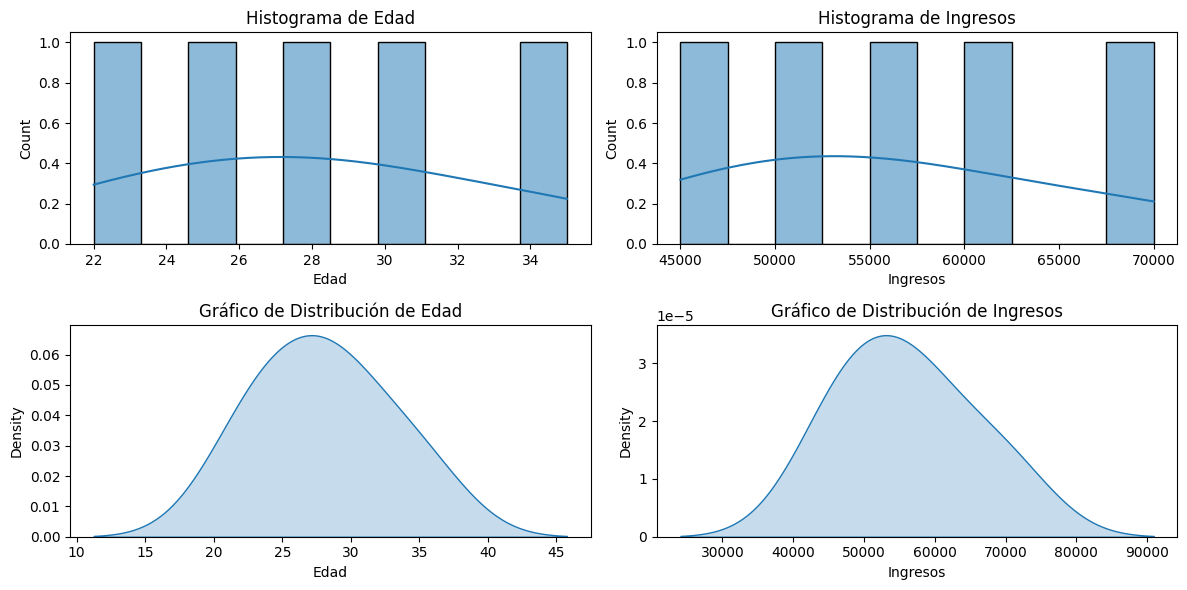

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['Edad'], bins=10, kde=True)
plt.title('Histograma de Edad')

plt.subplot(2, 2, 2)
sns.histplot(df['Ingresos'], bins=10, kde=True)
plt.title('Histograma de Ingresos')

# Gráficos de Distribución
plt.subplot(2, 2, 3)
sns.kdeplot(data=df, x='Edad', fill=True)
plt.title('Gráfico de Distribución de Edad')

plt.subplot(2, 2, 4)
sns.kdeplot(data=df, x='Ingresos', fill=True)
plt.title('Gráfico de Distribución de Ingresos')

plt.tight_layout()
plt.show()


5. tabla dinámica y mapa de calor

        Edad  Ingresos
Nombre                
Ana     25.0   50000.0
Carlos  35.0   70000.0
Eva     22.0   45000.0
Juan    30.0   60000.0
Luis    28.0   55000.0


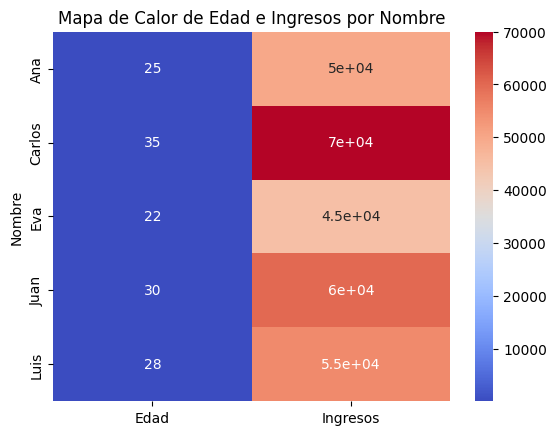

In [12]:
# Tabla Dinámica
tabla_pivot = df.pivot_table(index='Nombre', values=['Edad', 'Ingresos'], aggfunc='mean')
print(tabla_pivot)
# Mapa de Calor
sns.heatmap(tabla_pivot, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Edad e Ingresos por Nombre')
plt.show()


6. análisis de valores atípicos: diagrama de dispersión y/o diagrama de cajas

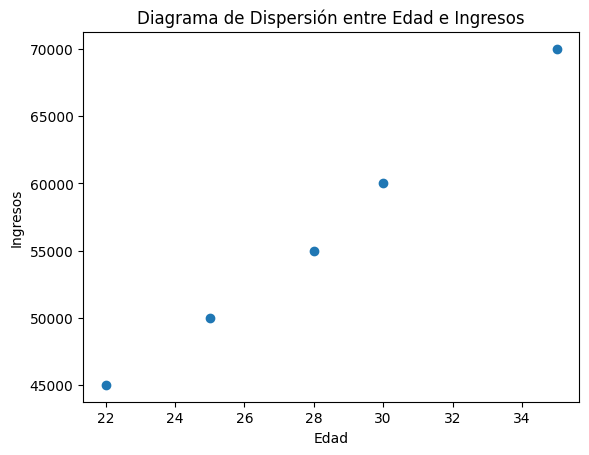

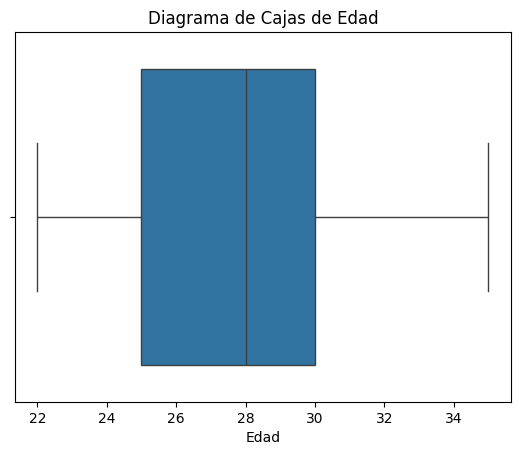

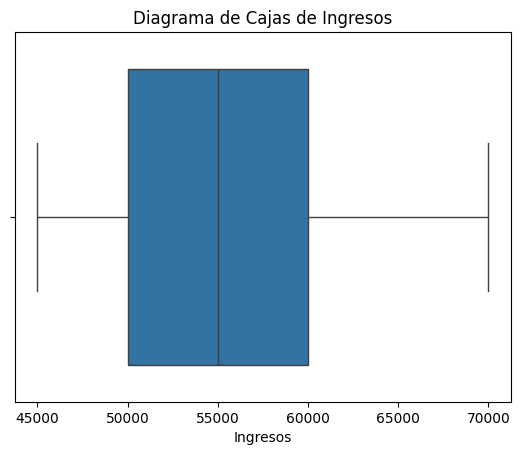

In [8]:
# Diagrama de Dispersión
plt.scatter(df['Edad'], df['Ingresos'])
plt.title('Diagrama de Dispersión entre Edad e Ingresos')
plt.xlabel('Edad')
plt.ylabel('Ingresos')
plt.show()

# Diagrama de Cajas
sns.boxplot(data=df, x='Edad')
plt.title('Diagrama de Cajas de Edad')
plt.show()

sns.boxplot(data=df, x='Ingresos')
plt.title('Diagrama de Cajas de Ingresos')
plt.show()


7. relaciones entre características: correlación y matriz de dispersión

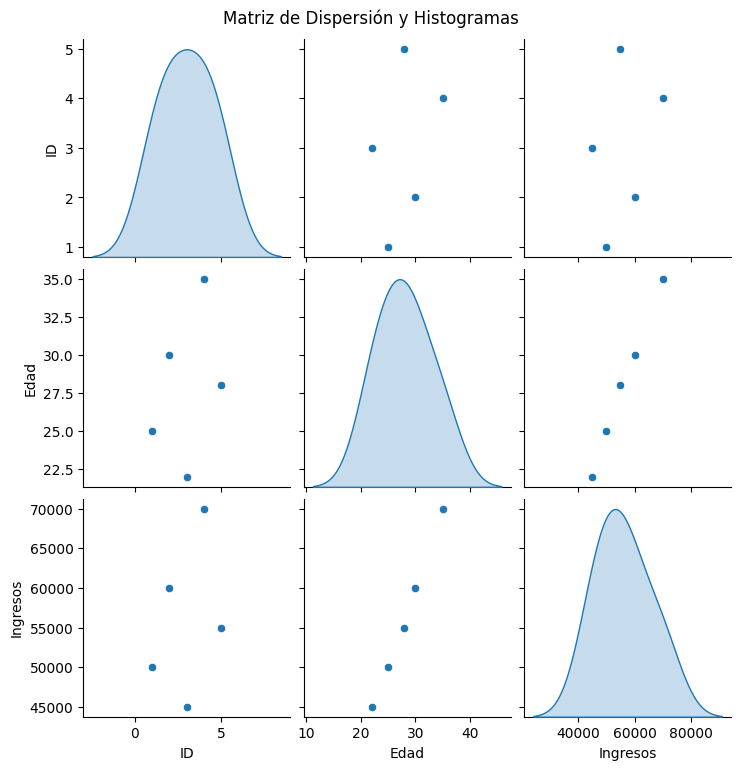

Matriz de Correlación:
                ID      Edad  Ingresos
ID        1.000000  0.351382  0.328798
Edad      0.351382  1.000000  0.997791
Ingresos  0.328798  0.997791  1.000000


In [10]:
# Correlación
correlacion = df2.corr()

# Matriz de Dispersión
sns.pairplot(df2, diag_kind='kde')
plt.suptitle('Matriz de Dispersión y Histogramas', y=1.02)
plt.show()

print("Matriz de Correlación:")
print(correlacion)


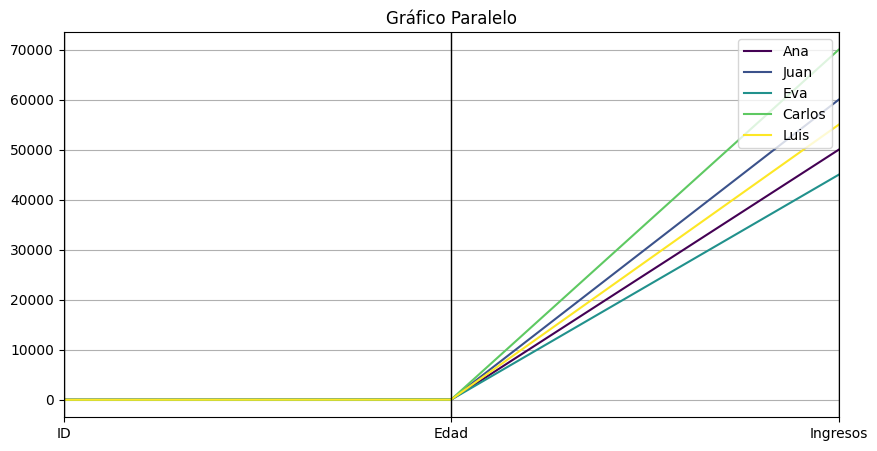

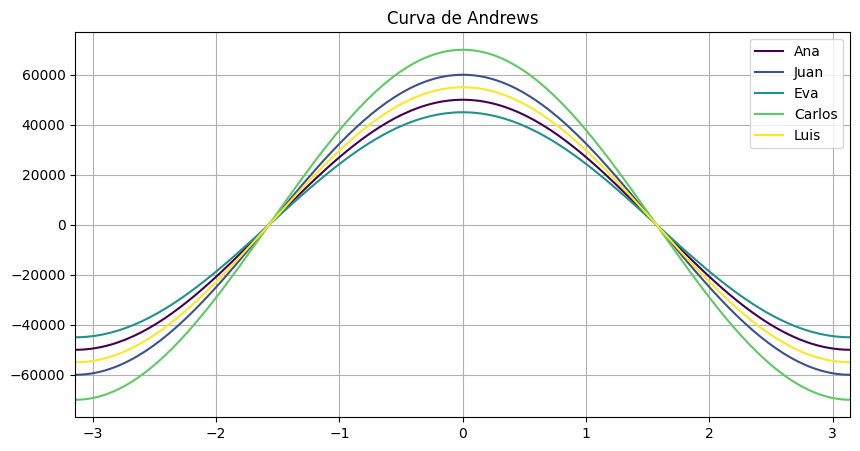

In [11]:
from pandas.plotting import parallel_coordinates, andrews_curves

# Gráfico Paralelo
plt.figure(figsize=(10, 5))
parallel_coordinates(df, class_column='Nombre', colormap='viridis')
plt.title('Gráfico Paralelo')
plt.show()

# Curva de Andrews
plt.figure(figsize=(10, 5))
andrews_curves(df, class_column='Nombre', colormap='viridis')
plt.title('Curva de Andrews')
plt.show()
